In [1]:
%load_ext autoreload
%autoreload 2
# Add parent directory into system path
import sys, os
sys.path.insert(1, os.path.abspath(os.path.normpath('..')))

In [2]:
from utils.libs import igl
import numpy as np

file = os.path.join('..', 'datasets', 'box_1.0.stl')

v,f = igl.read_triangle_mesh(file)
bv, bf = igl.bounding_box(v)

(x0, y0, z0), (x1, y1, z1) = bv[0], bv[-1]


In [3]:
from sdf.mesh import _cartesian_product 
N_STEP = 100
OFFSET = 2
dx, dy, dz = np.abs(bv[0]-bv[-1]) / N_STEP

X = np.linspace(x0-OFFSET*dx, x1+OFFSET*dx, N_STEP)
Y = np.linspace(y0-OFFSET*dy, y1+OFFSET*dy, N_STEP)
Z = np.linspace(z0-OFFSET*dz, z1+OFFSET*dz, N_STEP)
step = (X[1]-X[0], Y[1]-Y[0], Z[1]-Z[0])

P = _cartesian_product(X, Y, Z)

In [4]:
import pandas as pd
df = pd.DataFrame(P, columns = ['X', 'Y', 'Z'])

df['sdf'], _, _ = igl.signed_distance(P, v, f, 4, return_normals=False)

In [5]:
sdf, _, _ = igl.signed_distance(P, v, f, 4, return_normals=False)

In [43]:
x = sdf.reshape((N_STEP, N_STEP, N_STEP))

In [44]:
a = np.gradient(x, dx, dy, dz)
norm_gradient = np.linalg.norm(a, axis=0)

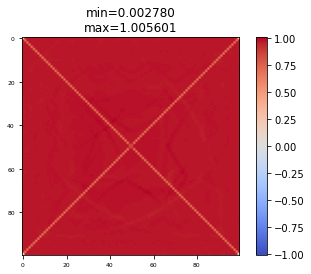

In [47]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
d = norm_gradient[50,:,:]
fig, ax = plt.subplots()
plt.imshow(d, cmap='coolwarm', norm=colors.CenteredNorm())
plt.colorbar()
ax.set_title('min=%.6f\nmax=%.6f' % (np.min(d), np.max(d)))
ax.tick_params(axis='both', which='major', labelsize=6)